# Heterogeneity in the Wealth Distribution of Billionaires

### Abstract
This notebook presents an analysis based on the net worth of billionaires in the years 1996, 2001, and 2014. It explores the hypothesis of a Pareto distribution of wealth and conducts both qualitative and quantitative analyses. The study begins by verifying the well-known Pareto principle in wealth distribution, followed by an in-depth qualitative and quantitative examination of wealth inequality among billionaires.

## Introduction
When we talk about net worth, we refer to the value of all financial and non-financial assets owned by an individual, from which debts owed to third parties (such as mortgages, taxes, etc.) are subtracted. This is a useful way to assess a person's wealth.\
In the past, wealth distribution across the entire population was analyzed by Vilfredo Pareto, who noticed that 80% of Italian assets were owned by 20% of the Italian population. This observation led to the concept of the Pareto principle, which is commonly stated as "80% of the effects come from 20% of the causes." The principle itself derives from a distribution known as the Pareto distribution, which is essentially an inverse power law and will be introduced later.\
It is important to clarify that the 80-20 rule comes from specific coefficients within the distribution and is not a universal law.\
Further studies show that, in general, wealth follows a Pareto distribution. The question we might ask is whether this same distribution holds at the extremes, particularly for billionaires. This would mean that by "zooming in" on a part of the population, the general law would re-emerge, forming a fractal-like pattern.

## Basic Data analysis
Next, we proceed by reading the file and performing an initial analysis of the data.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy
from scipy.optimize import curve_fit,minimize
import seaborn as sns
import matplotlib.pylab as plt
from sklearn import preprocessing
import networkx as nx

encoder = preprocessing.LabelEncoder() # Definisco un encoder nel caso mi serva

plt.rcParams.update({'font.size':18})# font leggibili

df = pd.read_excel('Billionaires1996,2001and2014updated.xlsx')#leggo i dati

df

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2001,A Jerrold Perenchio,151,United States,USA,3.0,self-made,executive,male,70.0,...,former chairman and CEO,1955.0,1.062180e+13,NaN,represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
2,2001,Abdul Al Rahman Al Jeraisy,336,Saudi Arabia,SAU,1.5,self-made,founder non-finance,male,NaN,...,founder,1956.0,1.830120e+11,NaN,NaN,NaN,http://www.jeraisy.com.sa/index.php/pages/rend...,NaN,NaN,NaN
3,2001,Abdul Aziz Al Ghurair,251,United Arab Emirates,ARE,1.9,inherited,inherited,male,47.0,...,relation,1960.0,1.030000e+11,NaN,inherited from father,NaN,NaN,NaN,NaN,NaN
4,1996,Abdul Aziz Al-Sulaiman,404,Saudi Arabia,SAU,1.0,self-made,self-made finance,male,0.0,...,founder,1968.0,1.577430e+11,NaN,NaN,NaN,http://www.arabianbusiness.com/arabian-busines...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,2014,Zhu Yicai,1154,China,CHN,1.5,self-made,self-made finance,male,49.0,...,founder,1993.0,NaN,diversified,NaN,NaN,http://www.forbes.com/profile/zhu-yicai/,NaN,NaN,NaN
2610,2014,Ziyad Manasir,609,Russia,RUS,2.8,self-made,privatized and resources,male,48.0,...,founder,1992.0,NaN,construction,close ties with Gazprom,NaN,http://www.forbes.com/profile/ziyad-manasir/,http://www.themoscowtimes.com/business/article...,NaN,NaN
2611,2014,Ziyaudin Magomedov,1372,Russia,RUS,1.2,self-made,privatized and resources,male,45.0,...,founder,2004.0,NaN,"port, gas",NaN,NaN,http://www.summagroup.ru/about/history/en/,http://www.forbes.com/profile/ziyaudin-magomedov/,NaN,NaN
2612,2014,Zong Qinghou,94,China,CHN,11.6,self-made,founder non-finance,male,68.0,...,founder,1987.0,NaN,beverages,NaN,NaN,http://en.wikipedia.org/wiki/Zong_Qinghou,http://mic.com/articles/39659/zong-qinghou-chi...,NaN,NaN


The dataset consists of 30 columns, with the last four representing sources of information. It also includes notes on the peculiarities of the billionaires, their country of origin, GDP, geographic location (North or South of the world), name, rank, and personal wealth.\
When checking for the presence of NaN (Not a Number) values, some columns contain NaNs while others do not. Focusing on the "networthusbillion" column, which is of primary interest, there are no issues with missing values. However, an important observation is that if one attempts to remove all NaN values blindly from the entire dataframe, the dataframe will disappear. This occurs because removing NaNs in this way deletes all rows, so if removal is necessary, it should be done selectively, targeting only the columns that require cleaning.

In [2]:
df.isnull().any()

year                       False
name                       False
rank                       False
citizenship                False
countrycode                False
networthusbillion          False
selfmade                    True
typeofwealth                True
gender                      True
age                         True
industry                    True
IndustryAggregates          True
region                     False
north                      False
politicalconnection         True
founder                    False
generationofinheritance    False
sector                      True
company                     True
companytype                 True
relationshiptocompany       True
foundingdate                True
gdpcurrentus                True
sourceofwealth              True
notes                       True
notes2                      True
source                      True
source_2                    True
source_3                    True
source_4                    True
dtype: boo

In [3]:
df = df.drop(['notes','notes2','source','source_2','source_3','source_4'],axis=1)


Some columns, such as "notes" and "source," are removed because they are not useful for the purpose of the research. These columns contain curiosities or sources of the data in the dataframe.\
To understand how the data correlates, one can plot a heatmap of the correlation matrix. However, this becomes overwhelming due to the 24 columns of data, while the goal is to focus on net worth. To achieve better visualization, network graphs can be used, which still provide insights into the various correlations.
To proceed with this, it is important to first examine the type of data in each column. This will help ensure that the analysis and visualization techniques applied are appropriate for each data type.

In [4]:
df.dtypes

year                         int64
name                        object
rank                         int64
citizenship                 object
countrycode                 object
networthusbillion          float64
selfmade                    object
typeofwealth                object
gender                      object
age                        float64
industry                    object
IndustryAggregates          object
region                      object
north                        int64
politicalconnection        float64
founder                      int64
generationofinheritance     object
sector                      object
company                     object
companytype                 object
relationshiptocompany       object
foundingdate               float64
gdpcurrentus               float64
sourceofwealth              object
dtype: object

As observed, some columns contain numerical values, while others do not. For instance, the "generationofinheritance" column contains both integer and string types. To obtain a complete correlation, it's necessary to use an encoder to convert non-numerical values into a suitable format for analysis.\
Additionally, errors may arise during this process, especially if there are unexpected values or missing data. These errors need to be handled carefully. One approach is to clean the data beforehand by converting or imputing non-numeric values, and then applying the encoder. This way, the entire dataset can be transformed into a consistent format, allowing for accurate correlation analysis.

In [5]:
head = df.columns
df_enc = df.copy()
for i in head: 
    try: #I transform the data using an encoder
        df_enc[i] = encoder.fit_transform(df_enc[i])
    except: # Handles errors
        df_enc[i] = df_enc[i].apply(str)
        df_enc[i] = encoder.fit_transform(df_enc[i])

At this point, we can proceed by creating the network.

In [6]:
# Transform into a dataframe link with 3 columns.
corr = df_enc.corr()
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']

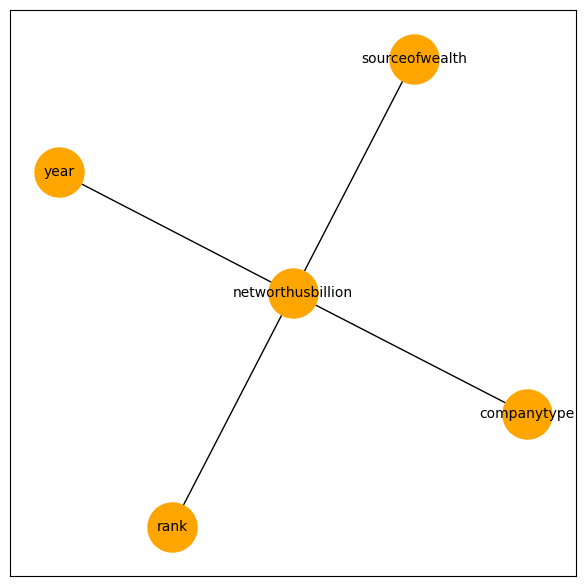

                  var1            var2     value
120  networthusbillion            year  0.120291
122  networthusbillion            rank -0.692479
139  networthusbillion     companytype -0.149488
143  networthusbillion  sourceofwealth -0.137317


In [7]:
# I impose a limit to avoid autocorrelation and focus on net worth in billions.
links_filtered=links.loc[ (np.abs(links['value']) > 0.1) & (links['var1'] != links['var2']) &  (links['var1']=='networthusbillion') ]


# I build the graph.
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')

# Plot of the network:

fig, ax = plt.subplots(figsize=(6.2, 6.2))

nx.draw_networkx(G, with_labels=True,
        node_color='orange',
        node_size=800, 
        edge_color='black', 
        linewidths=8, font_size=10,ax=ax)

plt.tight_layout()
plt.show()

print(links_filtered)

**Figure 1:** The graph represents the columns of the dataframe with an absolute correlation value greater than 0.1 relative to net worth. As expected, it shows a clear negative correlation with rank, a slight negative correlation with business type and company type, and a significant correlation with the year.

Obviously, since personal wealth is used to estimate the ranking of billionaires, an inversely proportional relationship is expected, meaning an anti-correlation. Regarding the type of business and company, the slight anti-correlations could mean that there are companies or types of businesses that yield more or are more frequently present in this dataset. The fact that there is a slight correlation with the year is not trivial; it could mean that the number of billionaires is increasing over time or that their capital is increasing. This correlation may be present due to inflation.

Now that the correlation has been analyzed, we can move on to analyzing the data year by year.

In [8]:
years = np.sort(df['year'].unique())
for i in years:
    print("Year:",i)
    print(df[df['year']==i]['networthusbillion'].describe())

Year: 1996
count    423.000000
mean       2.481087
std        2.046711
min        1.000000
25%        1.300000
50%        1.900000
75%        2.850000
max       18.500000
Name: networthusbillion, dtype: float64
Year: 2001
count    538.000000
mean       3.213011
std        4.433643
min        1.000000
25%        1.300000
50%        1.900000
75%        3.300000
max       58.700000
Name: networthusbillion, dtype: float64
Year: 2014
count    1653.000000
mean        3.904658
std         5.748520
min         1.000000
25%         1.400000
50%         2.100000
75%         3.700000
max        76.000000
Name: networthusbillion, dtype: float64


From this description, it can be seen that most billionaires are found in the year 2014, and their number has increased over the years. Moreover, the median for 1996 and 2001 is the same and slightly higher in 2014. What has increased significantly is the maximum, i.e., the wealth of the richest person. Additionally, by looking at the percentiles, it is clear that there cannot be a uniform or normal distribution of wealth, but rather a distribution that behaves like a tail. In fact, there is a gradual increase up to the 75th percentile, followed by a huge increase up to the 100th percentile. This characteristic means that up to 75% of people have less wealth per capita compared to the remaining 25%, i.e., there is a monotonically decreasing distribution that approaches zero as personal wealth increases. This can be of various types, with two known distributions that have these characteristics being Pareto or exponential.

# Pareto Distribution

Now that the connections between net worth have been visualized and the characteristics of the data have been checked, we proceed to plot the histogram of the data year by year. It will be immediately noticeable that they seem to follow an inversely proportional power law or an exponential law. For this purpose, the Pareto distribution is introduced.

The Pareto distribution is implemented in the scipy library and is given by:

$$\rho(x) = \frac{b}{x^{b+1}} \quad \text{with} \, x \geq 1 \, \land b > 0$$

$$F(x) = 1 - x^{-b}$$

This is the "standard" form, and it can be shifted and scaled with $x = (y - \mu)/\sigma$, to obtain a more general form, although it remains somewhat restrictive.  
The distribution in this form has the expected value:

$$<x> = \frac{b}{b - 1} \quad b > 1$$

And variance:

$$\sigma^2 = \frac{b}{(b - 2)(b - 1)^2} \quad b > 2$$

If the constraints are not satisfied, the expected value and/or variance are set to infinity.


## Qualitative Analysis

To begin, we can narrow down the data, for example, for the year 2001, and qualitatively observe how the data and the fits behave.

(1.5737323354363313, -0.5073904043757, 1.5073904043756998)

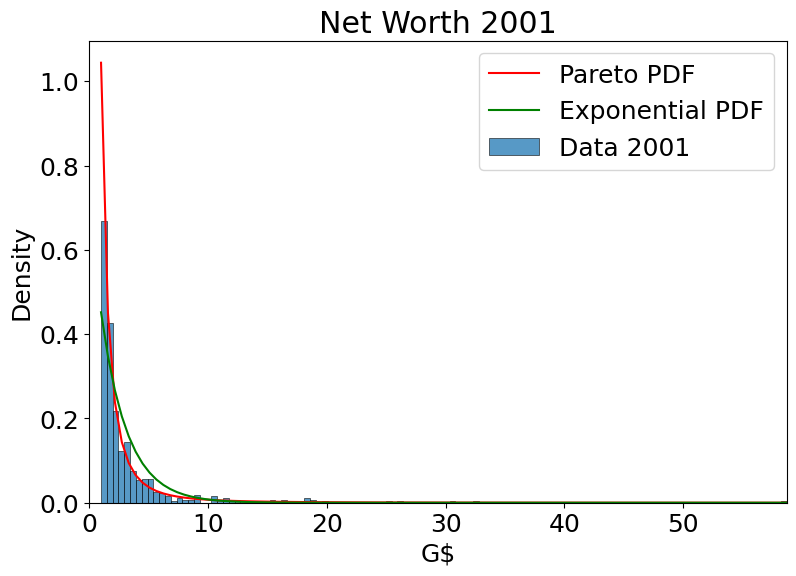

In [9]:
years = np.sort(df['year'].unique())

x_min =np.min((df[df['year']==2001])['networthusbillion'])
x_max = np.max((df[df['year']==2001])['networthusbillion'])
x = np.linspace(x_min,x_max,100)
    
plt.figure(figsize=(9,6))
# dati e fit
data_test =(df[(df['year']==2001)])['networthusbillion']
b,loc,scale = stats.pareto.fit(data_test) 
a,c = stats.expon.fit(data_test)

#plot 
sns.histplot(df[(df['year']==2001)],x='networthusbillion',stat='density',label='Data 2001')
plt.plot(x,stats.pareto.pdf(x,b,loc,scale),color='red',label='Pareto PDF')
plt.plot(x,stats.expon.pdf(x,a,c),color='green',label='Exponential PDF')
plt.xlabel( 'G$')
plt.ylabel('Density')
plt.xlim(0,x_max)
plt.legend()
plt.title("Net Worth 2001")
b,loc,scale

**Figure 2:** Histogram showing net worth in billions of dollars on the x-axis, and the number of billionaires normalized, i.e., the density, on the y-axis. The red line represents a fit of the Pareto distribution through MLE, while the green line represents an exponential fit.


At first glance, the fit seems good for Pareto, as the theoretical curve appears to represent the data well. However, to be sure, a statistical test, particularly a Kolmogorov–Smirnov test, should be performed.  
On the other hand, the exponential curve does not seem to represent the data well.  
Before doing this, a slightly modified Pareto distribution can also be considered, in order to satisfy certain properties.


## Modified Pareto Distribution

A Pareto distribution can be given in the form:

$$\rho(x) = b\frac{\sigma^{b+1}}{(x-\mu)^{b+1}} $$

Two conditions can then be applied to the CDF: $F(\infty) = 1$ and $F(x_{min}) = 0$. This leads to the relation:

$$\sigma^{b+1} = (x_{min} -\mu)^b$$

Substituting this result, we get:

$$\rho(x) = b \frac{\left(x_{min}-\mu\right)^b}{\left(x-\mu\right)^{b+1}} $$

$$F(x) = 1 - \left(\frac{x_{min}-\mu}{x-\mu}\right)^b$$

### Properties of the Modified Function

The expected value is given by:

$$ <x> = \frac{bx_{min} - \mu}{b-1}\quad b>1  $$

While the variance is given by:

$$\sigma^2 = \frac{b (x_{min} -\mu)^2}{(b-2)(b-1)^2}\quad b>2 $$

The value becomes infinite when the conditions are not met.  
These manipulations were made to offer slightly more flexibility compared to the distribution provided by scipy.  
Now, it is necessary to fit the data and perform a Kolmogorov-Smirnov test for the three distributions. Then, a graphical representation of the goodness (or lack thereof) of the fit against the cumulative distribution will be presented.


## Kolmogorov-Smirnov Test and Fit on the Data

<Figure size 900x600 with 0 Axes>

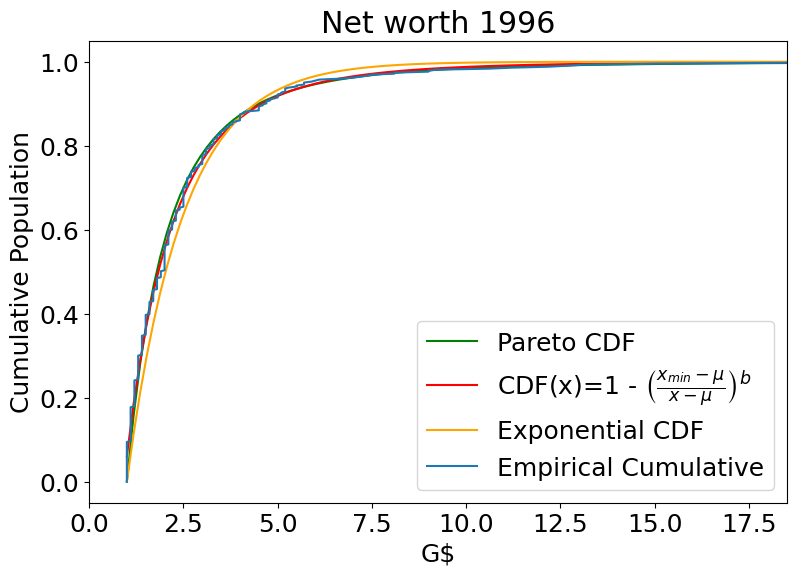

<Figure size 900x600 with 0 Axes>

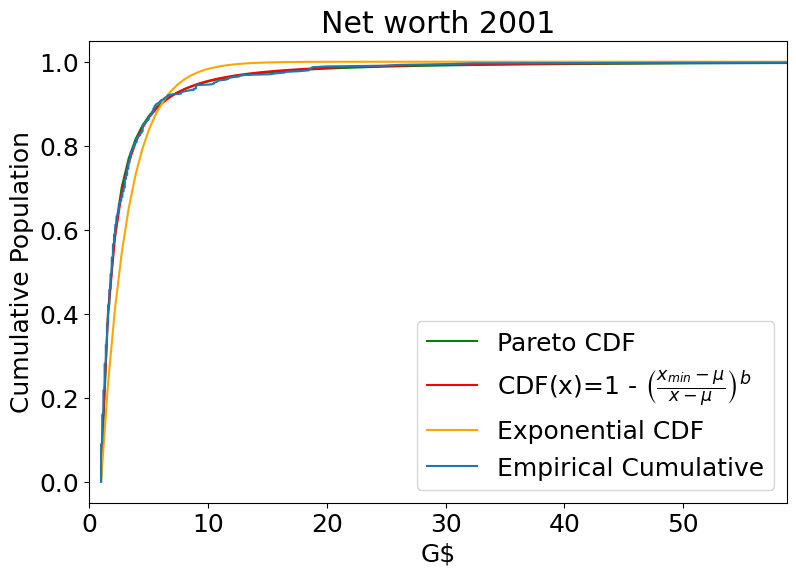

<Figure size 900x600 with 0 Axes>

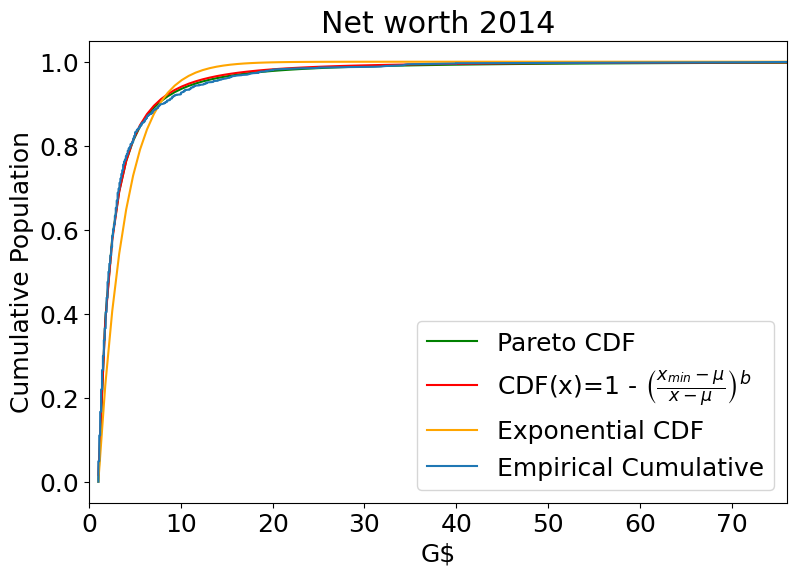

In [10]:
def power_pdf(x,x_min,mu,b): #modify Pareto pdf
    return (b*(x_min-mu)**b)/(x-mu)**(b+1)

def power_cdf(x,x_min,mu,b): #modify Pareto cdf
    return 1. - ((x_min-mu)/(x-mu))**(b)
    

years = np.sort(df['year'].unique())

arr = []

# Iterate over the years
for i in years:
    
    plt.figure(figsize=(9,6))
    
    j=0 
    x_min = np.min((df[df['year']==i])['networthusbillion'])
    x_max = np.max((df[df['year']==i])['networthusbillion'])

    x = np.linspace(x_min,x_max,100)
    plt.figure(figsize=(9,6))
    
    #I define the data to be used
    data_test =(df[(df['year']==i)])['networthusbillion']
    data_test = np.array(data_test)
    
    #I build the empirical cumulative distribution.
    y1=np.sort(data_test)
    idx1 = [ j/len(y1) for j in range(len(y1))]
    
    #fit
    b,loc,scale = stats.pareto.fit(data_test) 
    parameters, covariance = curve_fit(power_cdf,y1,idx1,p0=[x_min,-1.,b],maxfev=100000)
    a,c = stats.expon.fit(data_test)
    
    # Parameters saved for each year
    arr.append(parameters)
    
    #Plot distributions
    plt.plot(x,stats.pareto.cdf(x,b,loc,scale),color='green',label='Pareto CDF')
    plt.plot(x,power_cdf(x,parameters[0],parameters[1],parameters[2]),color='red',label='CDF(x)=1 - 'r"$\left(\frac{x_{min}-\mu}{x-\mu}\right)^b $")
    plt.plot(x,stats.expon.cdf(x,a,c),color="orange",label="Exponential CDF")
    
    #I perform the various KS tests.
    KS_test = scipy.stats.kstest(data_test,lambda x:scipy.stats.pareto.cdf(x,b,loc,scale))
    KS_fit = scipy.stats.kstest(data_test,lambda x:power_cdf(x,parameters[0],parameters[1],parameters[2]))
    KS_exp = scipy.stats.kstest(data_test,lambda x:scipy.stats.expon.cdf(x,a,c))
    
    #Empirical cumulative plot.
    plt.plot(y1,idx1,label='Empirical Cumulative')
    
    plt.xlim(0,x_max)
    plt.xlabel('G$')
    plt.ylabel('Cumulative Population')
    plt.title("Net worth {}".format(i))
    plt.legend()
    

**Figure 3:** The figures show the empirical cumulative distributions and the fits for the exponential, Pareto, and modified Pareto distributions. The x-axis represents wealth in billions of dollars, while the y-axis represents the total number of billionaires normalized.

From the graphs, it is clear that the exponential distribution does not describe the data well, while the other two distributions seem to provide a good description of the data. Below is a table with the various p-values for each year.

| Year | 1996 | 2001 | 2014 |
| ---  | ---  | ---  | ---  |
| Exponential p-value | 1.0673040730175386e-05 | 5.554084188678184e-20 | 5.073425124331284e-50 |
| Pareto p-value | 0.0006541884509268038 | 0.0002469829366910801 | 0.000688489800119178 |
| Modified Pareto p-value | 0.08645766809419364 | 0.14509734303656818 | 0.05645314173834537 |

Therefore, whether we assume $\alpha = 0.05$ or $\alpha = 0.01$, the result does not change. It is evident that the null hypothesis, which posits that the exponential distribution or the "classic" Pareto distribution describes the data well, should be rejected because $p < \alpha$.  
On the other hand, for the modified Pareto distribution, the null hypothesis cannot be rejected because $p > \alpha$, and it can be considered for describing the trend of the data. With this assumption, we can try to estimate the distribution of wealth.


## Lorenz Curve and Pareto Principle

One way to graphically evaluate the distribution of wealth is through the Lorenz curve. This curve is a function of the cumulative proportion of individuals mapped to the corresponding cumulative proportion of their wealth, so it is a curve that takes values from (0,0) to (1,1). The function is given by:

$$ L(F(x)) = \frac{\int_{-\infty}^x t\rho(t)\,dt}{<x>} $$

Where $F$ is the cumulative distribution and $\rho$ is the probability density.

**The points of the Lorenz curve represent expressions such as: "80% of the population owns 20% of the wealth"** and vice versa.  
If all individuals have the same wealth, then the Lorenz curve is the identity map, which means there is complete equality. Conversely, if all the wealth belongs to one individual, there is a delta at (1,0), which represents complete inequality.


The next step is to implement the Lorenz curve and find the points on the Lorenz curve. Note that the Lorenz curve, as defined, is parametric. To find the value of the parameter, we need to invert the cumulative distribution function found previously and then substitute that value into the Lorenz function. The goal now is to observe how the Pareto principle changes for the top 80% of billionaires.


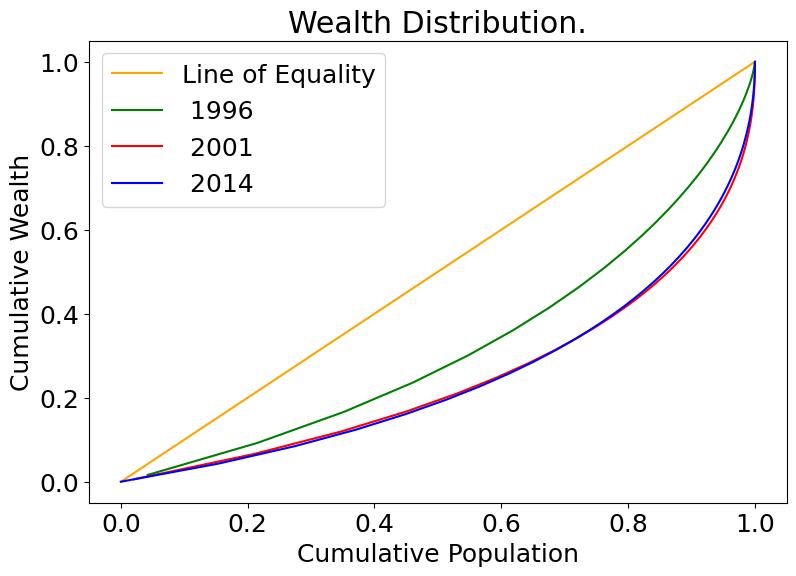

In [11]:
# lorenz function
def lorentz(x,par0,par1,par2):
    b = par2
    mu = -par1
    y = par0
    mean= (mu + b*y)/(b-1)
    return ((mu + b*y - (mu + x)**(-b)*(mu + b*x)*(mu + y)**b)/(-1 + b))/mean

#inverse cdf
def inverse_cdf(alpha,x_min,mu,b):
    return mu +(x_min -mu)/(1-alpha)**(1/b)

#plot Line of Equality
plt.figure(figsize=(9,6))
y= np.linspace(0,1,400)
plt.plot(y,y,c='orange',label="Line of Equality")

lor = []

parameter = np.empty(3)
#Iterate over the years
for i in enumerate(years):
    
    color = ['green','red','blue']
  
    parameter[0],parameter[1],parameter[2] = arr[i[0]]
    

    # I define the minimum to have a plot between (0,1) on the x-axis.
    x_min = parameters[0]
    x= np.linspace(x_min,10000,40000)
   # print(parameters[0],parameters[1],parameters[2])
    
    # I find the wealth values possessed by the top 80% of the population.
    eighty = inverse_cdf(0.8,parameter[0],parameter[1],parameter[2])
    lor.append(lorentz(eighty,parameter[0],parameter[1],parameter[2]))
    
    #plot
    plt.plot(power_cdf(x,parameter[0],parameter[1],parameter[2]),lorentz(x,parameter[0],parameter[1],parameter[2]),
            color = color[i[0]],label= ' {}'.format(i[1]))
    
    plt.xlabel('Cumulative Population')
    plt.ylabel('Cumulative Wealth')
    plt.legend()
    plt.title('Wealth Distribution.')

**Figure 4:** The figure shows the Lorenz curve for different years. The x-axis represents the cumulative population, while the y-axis represents the cumulative wealth.

It is observed that the curve tends to lower over the years, indicating inequality in the distribution of wealth. By inverting the cumulative distribution of the modified Pareto distribution, we can find what percentage of the wealth is held by the top 80% of billionaires.


In [12]:
print(lor)

[0.5564217588656947, 0.420505082783864, 0.42497898898334663]


So, for example, in 2014, we can say that the top 80% of billionaires hold 42.5% of the wealth, meaning the top 20% of billionaires hold 57.5% of the wealth.  
It is evident from the graph that the Lorenz curves are lowering, which is a sign of a less uniform distribution of wealth.

Now, it is not immediately clear whether the wealth is distributed evenly or not. A quantitative way to measure the inequality of wealth distribution is by calculating the Gini coefficient. This coefficient is calculated by taking the ratio of the area between the Lorenz curve and the line of perfect equality to the area under the line of perfect equality.  
A Gini coefficient of 1 indicates complete inequality, while a coefficient of 0 indicates perfect equality.

One way to calculate the Gini coefficient in the case of a discrete population with values \(x_i\) where \(i = 1, \dots, n\) is given by:

$$\displaystyle G = \frac{\sum_{i=1}^n \sum_{j=1}^n |x_i - x_j|}{2n\sum_{i=1}^n x_i} = \frac{\sum_{i=1}^n \sum_{j=1}^n |x_i - x_j|}{2 n^2 \bar{x}} $$

Where $\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$.


In [13]:
#Gini
def gini(x):
    totale = 0
    for i, xi in enumerate(x[:-1], 1):# oppure :-1
        totale += np.sum(np.abs(xi - x[i:]))
    return totale / (len(x)**2 * np.mean(x)) 

for i in years:

    inc = ((df[(df['year']==i)])['networthusbillion'])
    inc = np.array(inc)

    print("Gini coefficient in {}: ".format(i),gini(inc))


Gini coefficient in 1996:  0.35357870515848494
Gini coefficient in 2001:  0.46861568357744443
Gini coefficient in 2014:  0.5006950149380597


As we can see, the Gini coefficients increase over the years, at least in these samples. If this trend is general, it would mean that inequality is continuously increasing, even among the wealthiest individuals. However, the Gini coefficients are still not low, indicating that there is inequality in the distribution of wealth among billionaires, and this inequality grows over time.


## Conclusions 

From the analysis of the data, it seems that they are in good agreement with the distribution defined in the notebook. Therefore, this distribution applies not only to the entire population but also to subgroups like billionaires, although perhaps in a less distinct manner. It would also be interesting to investigate whether this trend holds for individual countries and whether similar inequalities appear in those cases.  
In general, it has also been observed that the number of billionaires and their total wealth seem to be increasing over time, but this is accompanied by a greater inequality (described by the Pareto principle), which also increases over time. Other factors that should be considered include inflation, and whether the wealthiest billionaires are the same individuals becoming richer over time, or whether there is a turnover, or if one sector predominates in terms of capital or if it is more or less evenly distributed.
